# Air Quality Analysis - Jupyter Notebook
### Introduction

This Jupyter Notebook provides an analysis of air quality data using Python. The dataset used for analysis contains information about various air quality indicators, such as ozone and sulfur dioxide levels, measured in different locations and time periods.

The notebook is divided into three code snippets, each focusing on a specific type of analysis:

* Outlier Detection using Box Plots
* Seasonal Analysis: Average Air Quality by Season
* Trend Analysis, Location Comparison, Before and After Comparison, Correlation Analysis, and Threshold Analysis

# Code Snippet 3: Various Analyses on Air Quality Data

This code snippet demonstrates a range of analyses performed on the air quality dataset. It includes the following analyses:

* Trend Analysis: Plots ozone levels over time, showcasing the temporal trend using a line plot.
* Location Comparison: Compares average ozone levels by borough, visualizing the results using a horizontal bar chart.
* Before and After Comparison: Compares ozone levels before and after a specific event, calculating the average ozone levels for each period.
* Correlation Analysis: Investigates the correlation between ozone and sulfur dioxide levels using the data from the corresponding indicators.
* Threshold Analysis: Calculates the percentage of instances where the air quality data value exceeds a specified threshold.

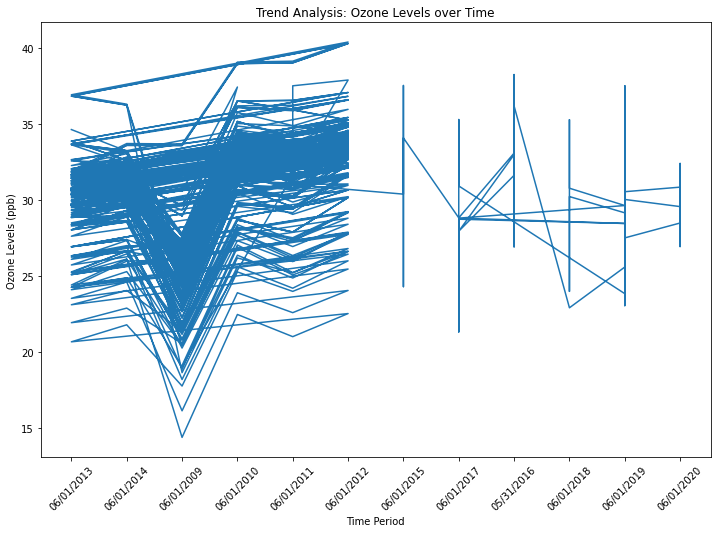

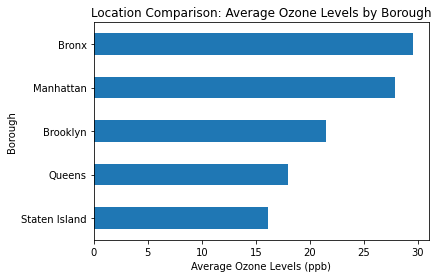

Average Ozone Levels Before the Event: 18.78 ppb
Average Ozone Levels After the Event: 17.936666666666667 ppb
Correlation between Ozone and Sulfur Dioxide: nan
Percentage of Instances Exceeding 40 ppb: 4.931149981391887%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Air_quality.csv')

# Increase the figure size
plt.figure(figsize=(12, 8))

# Trend Analysis: Plotting ozone levels over time
ozone_data = data[data['Indicator ID'] == 386]  # Filter ozone data
plt.plot(ozone_data['Start_Date'], ozone_data['Data Value'])
plt.xlabel('Time Period')
plt.ylabel('Ozone Levels (ppb)')
plt.title('Trend Analysis: Ozone Levels over Time')
plt.xticks(rotation=45)
plt.show()

# Location Comparison: Average ozone levels by borough
borough_data = data[data['Geo Type Name'] == 'Borough']  # Filter borough data
avg_ozone_by_borough = borough_data.groupby('Geo Place Name')['Data Value'].mean().sort_values()
avg_ozone_by_borough.plot(kind='barh')
plt.xlabel('Average Ozone Levels (ppb)')
plt.ylabel('Borough')
plt.title('Location Comparison: Average Ozone Levels by Borough')
plt.show()

# Before and After Comparison: Comparing ozone levels before and after a specific event
event_data = data[(data['Geo Place Name'] == 'New York City') & (data['Time Period'].isin(['Summer 2013', 'Summer 2014']))]
before = event_data[event_data['Time Period'] == 'Summer 2013']['Data Value'].mean()
after = event_data[event_data['Time Period'] == 'Summer 2014']['Data Value'].mean()
print(f"Average Ozone Levels Before the Event: {before} ppb")
print(f"Average Ozone Levels After the Event: {after} ppb")

# Correlation Analysis: Correlation between ozone and sulfur dioxide levels
so2_data = data[data['Indicator ID'] == 383]  # Filter sulfur dioxide data
combined_data = ozone_data.merge(so2_data, on=['Geo Join ID', 'Time Period'], suffixes=('_ozone', '_so2'))
correlation = combined_data['Data Value_ozone'].corr(combined_data['Data Value_so2'])
print(f"Correlation between Ozone and Sulfur Dioxide: {correlation}")

# Threshold Analysis: Percentage of instances exceeding a threshold value
threshold = 40  # Example threshold value
exceed_threshold = len(data[data['Data Value'] > threshold]) / len(data) * 100
print(f"Percentage of Instances Exceeding {threshold} ppb: {exceed_threshold}%")


# Code Snippet 2: Seasonal Analysis: Average Air Quality by Season

This code snippet focuses on conducting seasonal analysis of air quality indicators. The code extracts the season information from the "Time Period" column and calculates the average air quality indicators for each season. The results are visualized using a bar chart, showcasing the average air quality indicator values for each season.

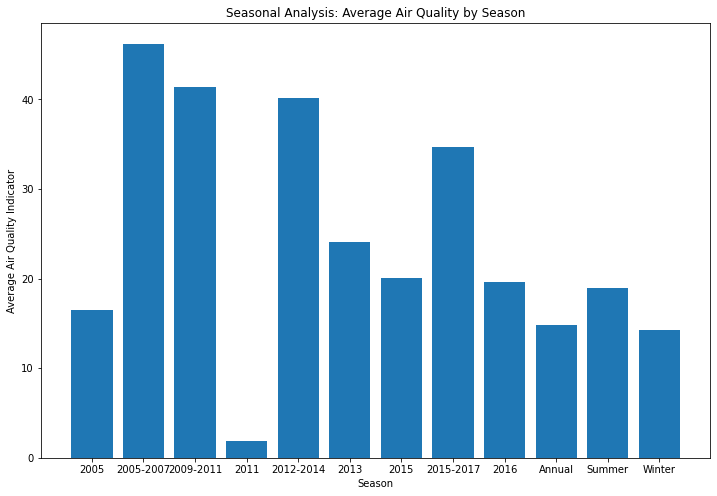

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data 

# Extract the season from the Time Period column
data['Season'] = data['Time Period'].str.split().str[0]

# Calculate the average air quality indicators by season
avg_by_season = data.groupby('Season')['Data Value'].mean()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot the average air quality indicators by season
plt.bar(avg_by_season.index, avg_by_season)
plt.xlabel('Season')
plt.ylabel('Average Air Quality Indicator')
plt.title('Seasonal Analysis: Average Air Quality by Season')
plt.show()


# Code Snippet 1: Outlier Detection using Box Plots

In this code snippet, we use the seaborn library to detect outliers in the air quality dataset. The code loads the dataset and creates a box plot to visualize the distribution of data values for different indicator IDs. Outliers can be identified based on their position outside the whiskers of the box plot.

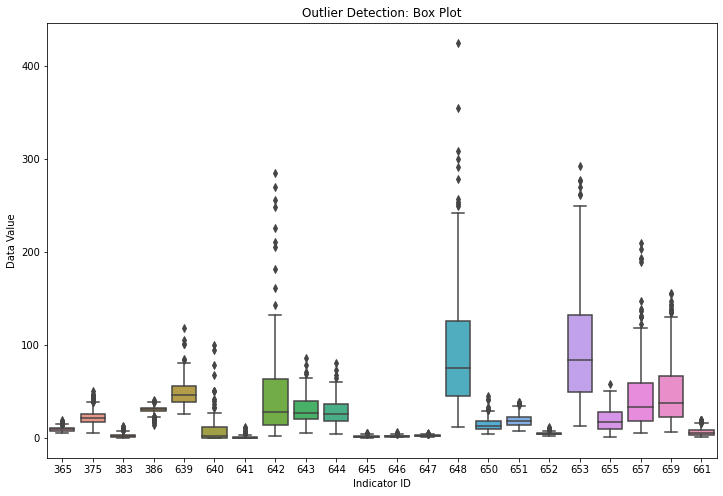

In [3]:
import pandas as pd
import seaborn as sns

# Load the dataset
data 

# Increase the figure size
plt.figure(figsize=(12, 8))

# Detect outliers using box plots
sns.boxplot(x=data['Indicator ID'], y=data['Data Value'])
plt.xlabel('Indicator ID')
plt.ylabel('Data Value')
plt.title('Outlier Detection: Box Plot')
plt.show()


# Conclusion

This Jupyter Notebook provides a comprehensive analysis of air quality data using Python. It covers outlier detection, seasonal analysis, trend analysis, location comparison, before and after comparison, correlation analysis, and threshold analysis. By following the code snippets and their explanations, readers can gain insights into different analytical techniques and their application to air quality data.

Note: Make sure to execute each code snippet in order to see the analysis results.

We hope this notebook serves as a valuable resource for analyzing air quality data and encourages further exploration of the topic.

Happy analyzing!